In [9]:
import pandas as pd
import json

directory = "data/"

# Load User data
with open(directory+'yelp_academic_dataset_user.json', 'r', encoding='utf-8') as f:
    user_data = [json.loads(line) for line in f]
user_df = pd.DataFrame(user_data)

# Load Tip data
with open(directory+'yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as f:
    tip_data = [json.loads(line) for line in f]
tip_df = pd.DataFrame(tip_data)

# Load business data
with open(directory+'yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    business_data = [json.loads(line) for line in f]
business_df = pd.DataFrame(business_data)

# Load review data
with open(directory+'yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    review_data = [json.loads(line) for line in f]
review_df = pd.DataFrame(review_data)

# Load check-in data
with open(directory+'yelp_academic_dataset_checkin.json', 'r', encoding='utf-8') as f:
    checkin_data = [json.loads(line) for line in f]
checkin_df = pd.DataFrame(checkin_data)

# Exploratory Data Analysis

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

### Rating Distribution: Reviews Table

/Users/arnav/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


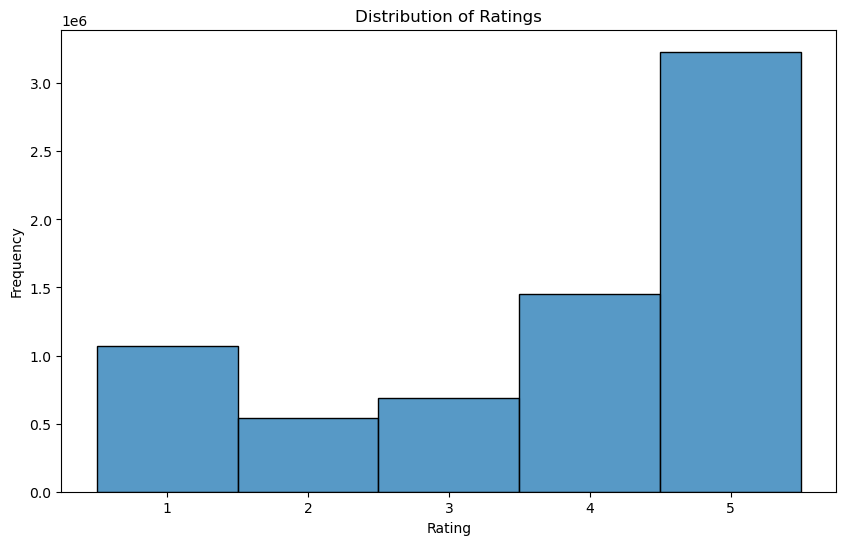

In [ ]:
# Create a histogram of rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=review_df, x='stars', discrete=True)

# Create a plot
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.show()

### Business Location (by State) Distribution: Business Table

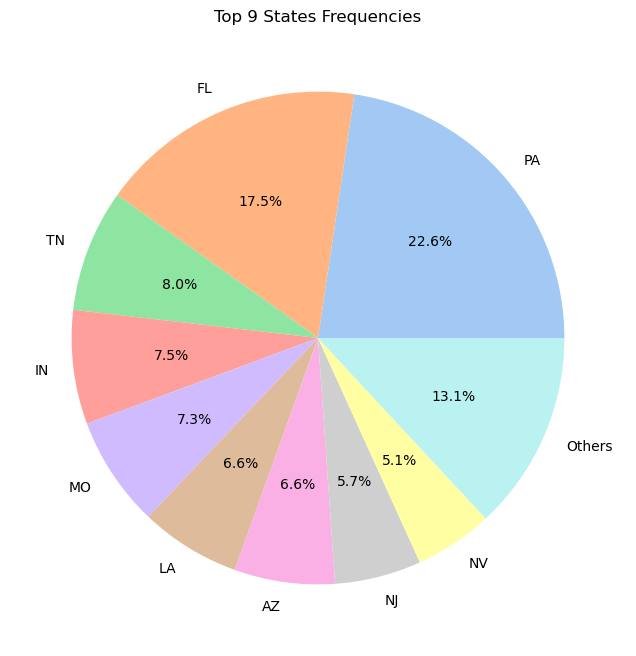

In [ ]:
# Show the top k states and their frequencies
k = 9

# Map the state to the count
state_counts = business_df['state'].value_counts()

# Separate top k states and group the rest as "Others"
top_k_states = state_counts.nlargest(k)
other_states_count = state_counts.iloc[k:].sum()
top_k_states['Others'] = other_states_count

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_k_states, labels=top_k_states.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

plt.title(f'Top {k} States Frequencies')

plt.show()

### Number of Reviews given by each user

In [41]:
review_df['user_id'].value_counts()

user_id
_BcWyKQL16ndpBdggh2kNA    3048
Xw7ZjaGfr0WNVt6s_5KZfA    1840
0Igx-a1wAstiBDerGxXk2A    1747
-G7Zkl1wIWBBmD0KRy_sCw    1682
ET8n-r7glWYqZhuR6GcdNw    1653
                          ... 
wECd-0riShbpLpwlYdIKsw       1
jMCXWGpebX7bo6FMFh081g       1
IW7iNmK1om-3yOvI0XKeTA       1
r9QuC6iydjD-qj6nnRWtMA       1
_XVdmFWSgTN6YlojUxixTA       1
Name: count, Length: 1987929, dtype: int64

Number of users not shown (more than 15 reviews): 61428


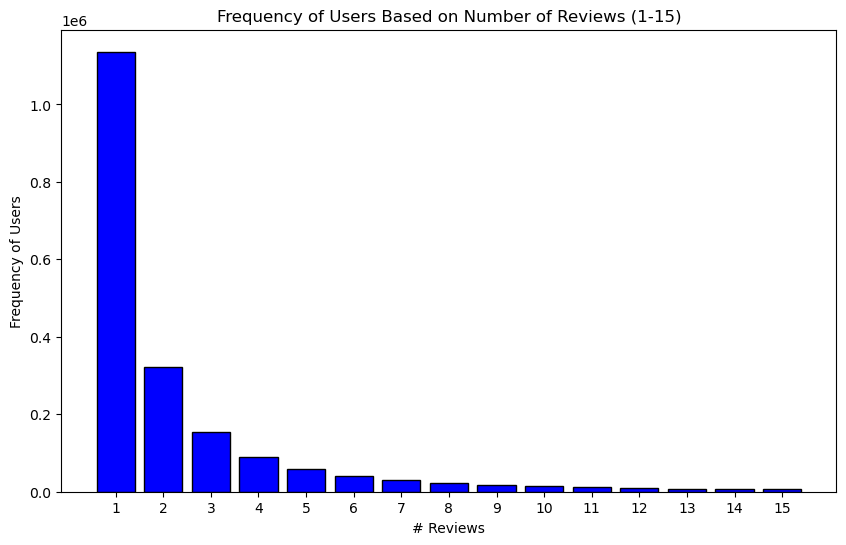

In [ ]:
# Map of users to the num reviews
user_review_counts = review_df['user_id'].value_counts()

# Filter to users with num reviews between [1, 15]
filter_review_counts = user_review_counts[(user_review_counts >= 1) & (user_review_counts <= 15)]

frequency = filter_review_counts.value_counts()

# Exclude the users who have more than 10 reviews from the distribution
excluded_users = len(user_review_counts[(user_review_counts > 15)])

print(f"Number of users not shown (more than 15 reviews): {excluded_users}")

# Create teh plot
plt.figure(figsize=(10,6))
plt.bar(frequency.index, frequency.values)

plt.xlabel('# Reviews')
plt.ylabel('Frequency of Users')
plt.title('Frequency of Users Based on Number of Reviews (1-15)')
plt.xticks(frequency.index)

plt.show()